# Temat testów
### Czy istnieje istotna statystycznie różnica w poprawności odpowiedzi w zależności od oceny trudności zadania?
- zsumowane grafiki
- każda grafika osobno

### Czy istnieje istotna statystycznie różnica w ocenie trudności zadania w zależności od poprawności?
- każda grafika osobno

In [13]:
import pandas as pd

from functions.tests.independent_groups.more_than_two_groups import chi2_or_chi2_yate_test
from functions.tests.independent_groups.two_groups import mann_whitney_test
from functions.tests.helper import create_contingency_table
from functions.others import corr_answer_index
from functions.plots import plot_heatmap, plot_multi_boxplot
from functions.set_preparations import prepare_row

In [14]:
df_answers = pd.read_csv('/Users/martasolarz/Studies/Thesis/Master_thesis/prepare_datasets/sets/correctness.csv')

df_answers.head()

,ID,1a_trud,1b_trud,2a_trud,2b_trud,3a_trud,3b_trud,Trud_all,Corr_all,1a_corr,...,SumCorr_a,SumCorr_b,SumCorr_1,SumCorr_2,SumCorr_3,SumTrud_a,SumTrud_b,SumTrud_1,SumTrud_2,SumTrud_3
0,1,3,1,4,3,4,4,19,4,1,...,2,2,2,0,2,11,8,4,7,8
1,2,1,2,3,1,2,4,13,5,1,...,2,3,2,2,1,6,7,3,4,6
2,3,2,1,3,1,1,1,9,4,1,...,2,2,2,2,0,6,3,3,4,2
3,4,3,2,2,1,3,5,16,5,1,...,3,2,2,2,1,8,8,5,3,8
4,5,4,2,3,2,3,3,17,6,1,...,3,3,2,2,2,10,7,6,5,6


In [15]:
# Utworzenie kolekcji:
# wszystkie grafiki
corr = prepare_row(df_answers.filter(regex='.*_corr$'))
conf = prepare_row(df_answers.filter(regex='.*_trud$'))
df_collAll = pd.DataFrame({'correctness': corr, 'difficulty': conf})

# grafiki A
corr = prepare_row(df_answers.filter(regex='.*a_corr$'))
conf = prepare_row(df_answers.filter(regex='.*a_trud$'))
df_collA = pd.DataFrame({'correctness': corr, 'difficulty': conf})

# grafiki B
corr = prepare_row(df_answers.filter(regex='.*b_corr$'))
conf = prepare_row(df_answers.filter(regex='.*b_trud$'))
df_collB = pd.DataFrame({'correctness': corr, 'difficulty': conf})

# grafiki 1
corr = prepare_row(df_answers.filter(regex='1.*_corr$'))
conf = prepare_row(df_answers.filter(regex='1.*_trud$'))
df_coll1 = pd.DataFrame({'correctness': corr, 'difficulty': conf})

# grafiki 2
corr = prepare_row(df_answers.filter(regex='2.*_corr$'))
conf = prepare_row(df_answers.filter(regex='2.*_trud$'))
df_coll2 = pd.DataFrame({'correctness': corr, 'difficulty': conf})

# grafiki 3
corr = prepare_row(df_answers.filter(regex='3.*_corr$'))
conf = prepare_row(df_answers.filter(regex='3.*_trud$'))
df_coll3 = pd.DataFrame({'correctness': corr, 'difficulty': conf})

## TESTY

### Czy istnieje istotna statystycznie różnica w poprawności odpowiedzi w zależności od oceny trudności zadania?

**H0:** Nie ma istotnej statystycznie zależności między poprawnością odpowiedzi a poziomem trudności.

**H1:** Istnieje istotna statystycznie zależność między poprawnością odpowiedzi a poziomem trudności.

**Poziom istotności:** $\alpha=0.05$

In [16]:
ALPHA = 0.05

Testy dla zsumowanych grafik

In [17]:
# wszystkie grafiki
chi2_or_chi2_yate_test(df_answers, 'Corr_all', 'Trud_all', ALPHA)

Trud_all  9   10  11  12  13  14  15  16  17  18  19  20  22
Corr_all                                                    
0          0   0   0   0   0   0   0   0   1   0   0   0   0
2          0   0   1   1   0   1   0   0   0   0   0   0   0
3          0   1   2   0   1   1   0   1   1   0   0   0   1
4          1   1   0   0   1   2   0   0   0   0   1   2   0
5          0   2   0   1   3   1   2   2   0   0   1   1   0
6          0   0   0   0   0   1   1   2   1   2   0   0   0
Chi2 test with Yate's correction conducted...
Chi-squared test statistic value: 64.39010989010988
P-value: 0.325660557245181
Brak podstaw do odrzucenia H0.


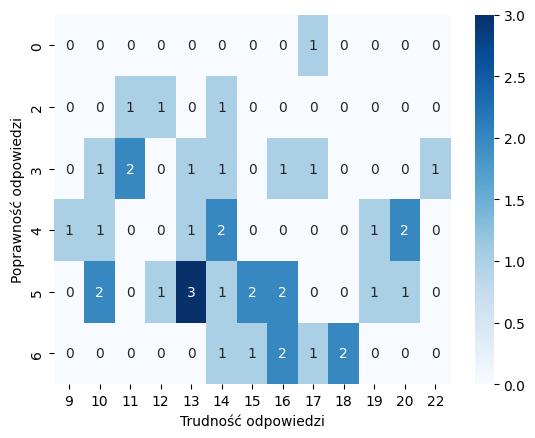

In [18]:
plot_heatmap(df_answers, 'Corr_all', 'Trud_all', 'Poprawność odpowiedzi', 'Trudność odpowiedzi', cmap='Blues')

In [19]:
# grafiki A i B
chi2_or_chi2_yate_test(df_answers, 'SumCorr_a', 'SumTrud_a', ALPHA)
print('-------------------------')
chi2_or_chi2_yate_test(df_answers, 'SumCorr_b', 'SumTrud_b', ALPHA)

SumTrud_a  5   6   7   8   9   10  11  12
SumCorr_a                                
0           0   0   0   1   0   0   0   0
1           0   3   2   2   0   0   0   1
2           1   9   1   1   2   1   1   0
3           1   1   3   8   0   1   1   0
Chi2 test with Yate's correction conducted...
Chi-squared test statistic value: 24.174145299145295
P-value: 0.28469741671589727
Brak podstaw do odrzucenia H0.
-------------------------
SumTrud_b  3   4   5   6   7   8   9   10  11  12
SumCorr_b                                        
0           0   0   0   0   0   0   1   0   0   0
1           0   1   2   2   0   1   0   0   0   0
2           1   1   3   0   4   7   0   3   1   1
3           0   2   0   1   4   2   1   2   0   0
Chi2 test with Yate's correction conducted...
Chi-squared test statistic value: 39.52380952380952
P-value: 0.056732340682468206
Brak podstaw do odrzucenia H0.


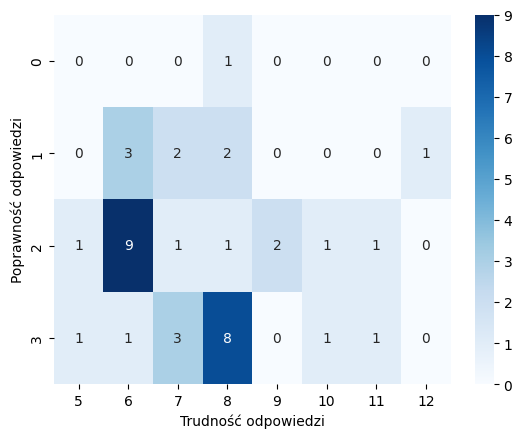

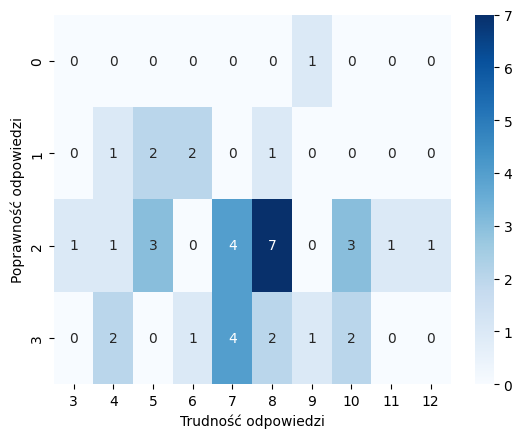

In [20]:
plot_heatmap(df_answers, 'SumCorr_a', 'SumTrud_a', 'Poprawność odpowiedzi', 'Trudność odpowiedzi', cmap='Blues')
plot_heatmap(df_answers, 'SumCorr_b', 'SumTrud_b', 'Poprawność odpowiedzi', 'Trudność odpowiedzi', cmap='Blues')

In [21]:
# grafiki 1, 2, 3
chi2_or_chi2_yate_test(df_answers, 'SumCorr_1', 'SumTrud_1', ALPHA)
print('-------------------------')
chi2_or_chi2_yate_test(df_answers, 'SumCorr_2', 'SumTrud_2', ALPHA)
print('-------------------------')
chi2_or_chi2_yate_test(df_answers, 'SumCorr_3', 'SumTrud_3', ALPHA)

SumTrud_1  2  3  4   5  6  7
SumCorr_1                   
0          0  0  0   2  0  0
1          0  1  2   1  0  0
2          4  6  6  12  4  2
Chi2 test with Yate's correction conducted...
Chi-squared test statistic value: 6.831932773109244
P-value: 0.7412105598869706
Brak podstaw do odrzucenia H0.
-------------------------
SumTrud_2  2  3  4  5  6  7  8
SumCorr_2                     
0          0  0  2  1  1  2  2
1          0  0  4  0  2  1  0
2          3  8  6  4  2  2  0
Chi2 test with Yate's correction conducted...
Chi-squared test statistic value: 21.080000000000005
P-value: 0.04922117692231862
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
-------------------------
SumTrud_3  2  3  4  5  6  7  8  9
SumCorr_3                        
0          3  0  3  5  1  0  0  0
1          0  2  3  2  3  1  2  3
2          0  0  1  0  3  3  4  1
Chi2 test with Yate's correction conducted...
Chi-squared test statistic value: 29.424603174603174
P-value: 0.009151011697495505
Ist

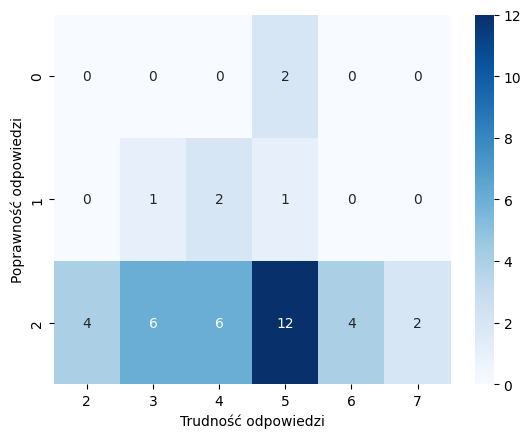

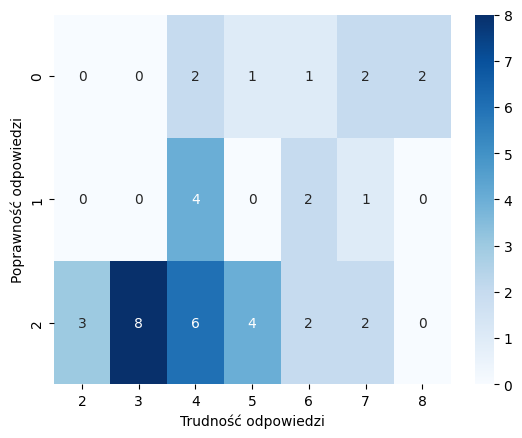

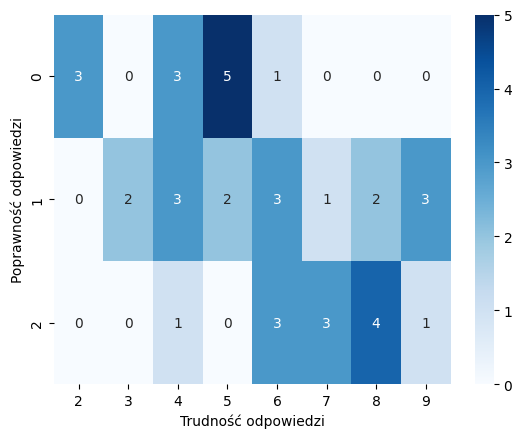

In [22]:
plot_heatmap(df_answers, 'SumCorr_1', 'SumTrud_1', 'Poprawność odpowiedzi', 'Trudność odpowiedzi', cmap='Blues')
plot_heatmap(df_answers, 'SumCorr_2', 'SumTrud_2', 'Poprawność odpowiedzi', 'Trudność odpowiedzi', cmap='Blues')
plot_heatmap(df_answers, 'SumCorr_3', 'SumTrud_3', 'Poprawność odpowiedzi', 'Trudność odpowiedzi', cmap='Blues')

Testy dla poszczególnych grafik 1a, 1b, 2a, 2b, 3a, 3b

In [23]:
df1a = pd.DataFrame({'correctness': df_answers['1a_corr'], 'difficulty': df_answers['1a_trud']})
df2a = pd.DataFrame({'correctness': df_answers['2a_corr'], 'difficulty': df_answers['2a_trud']})
df3a = pd.DataFrame({'correctness': df_answers['3a_corr'], 'difficulty': df_answers['3a_trud']})

df1b = pd.DataFrame({'correctness': df_answers['1b_corr'], 'difficulty': df_answers['1b_trud']})
df2b = pd.DataFrame({'correctness': df_answers['2b_corr'], 'difficulty': df_answers['2b_trud']})
df3b = pd.DataFrame({'correctness': df_answers['3b_corr'], 'difficulty': df_answers['3b_trud']})

dfs = [df1a, df1b, df2a, df2b, df3a, df3b]

In [24]:
names = {
    1: '1a:',
    2: '1b:',
    3: '2a:',
    4: '2b:',
    5: '3a:',
    6: '3b:',
}

In [25]:
for i, df in enumerate(dfs):
    print('-------------------------------------')
    print(names[i+1])
    chi2_or_chi2_yate_test(df, 'correctness', 'difficulty', ALPHA)

-------------------------------------
1a:
difficulty   1   2   3  4  5
correctness                 
0            1   2   2  0  0
1            6  12  12  4  1
Chi2 test with Yate's correction conducted...
Chi-squared test statistic value: 0.8163265306122449
P-value: 0.9362459604000678
Brak podstaw do odrzucenia H0.
-------------------------------------
1b:
difficulty    1   2  3  4
correctness              
0             1   2  0  0
1            12  17  7  1
Chi2 test with Yate's correction conducted...
Chi-squared test statistic value: 0.9001714264872159
P-value: 0.8253864396822264
Brak podstaw do odrzucenia H0.
-------------------------------------
2a:
difficulty   1   2  3  4  5
correctness                
0            0   2  4  5  1
1            8  13  7  0  0
Chi2 test with Yate's correction conducted...
Chi-squared test statistic value: 19.624819624819626
P-value: 0.00059217090063551
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
-------------------------------------

-------------------------------------
1a:


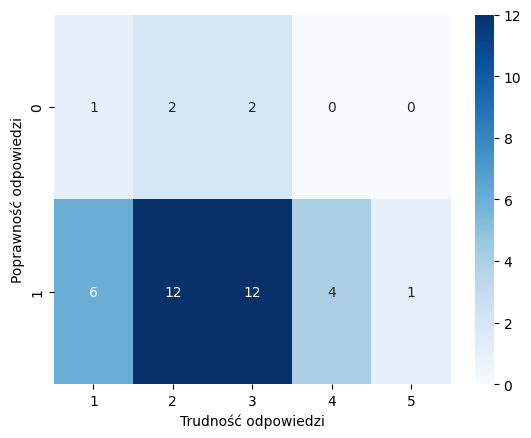

-------------------------------------
1b:


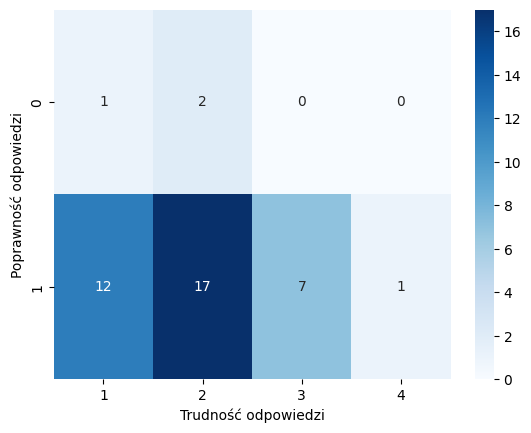

-------------------------------------
2a:


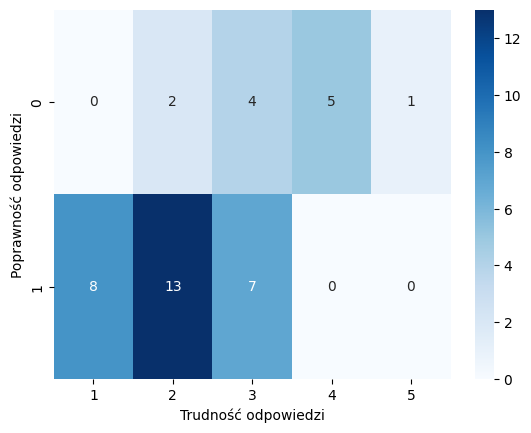

-------------------------------------
2b:


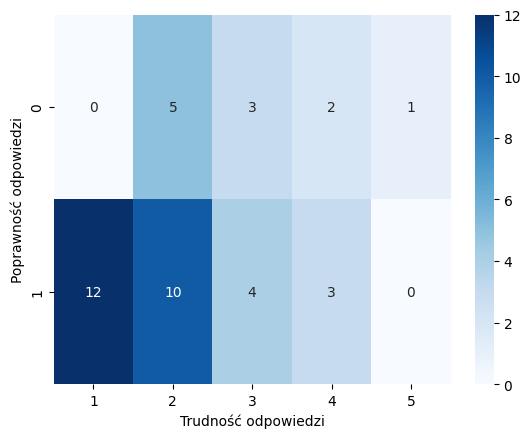

-------------------------------------
3a:


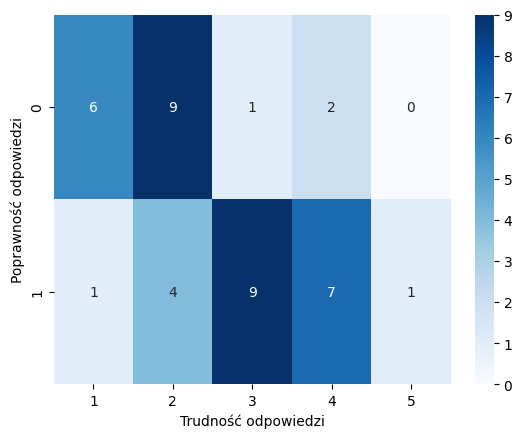

-------------------------------------
3b:


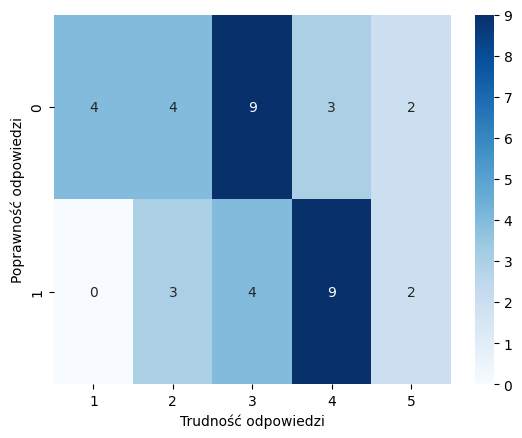

In [26]:
for i, df in enumerate(dfs):
    print('-------------------------------------')
    print(names[i+1])
    plot_heatmap(df, 'correctness', 'difficulty', 'Poprawność odpowiedzi', 'Trudność odpowiedzi', cmap='Blues')

-------------------------------------
1a:
Trudność: 1, Wskaźnik: 0.8333333333333334
Trudność: 2, Wskaźnik: 0.8333333333333334
Trudność: 3, Wskaźnik: 0.8333333333333334
Trudność: 4, Wskaźnik: 1.0
Trudność: 5, Wskaźnik: 1.0


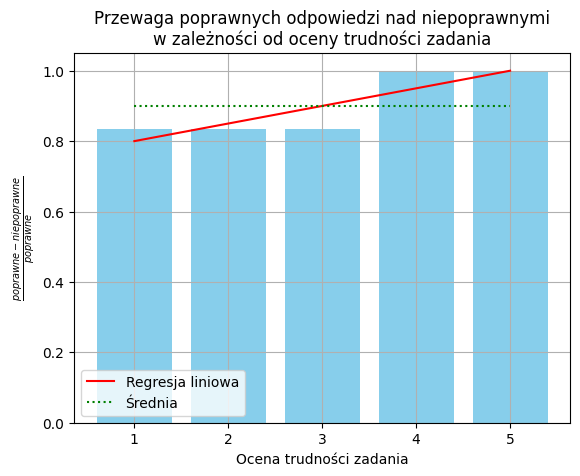

-------------------------------------
1b:
Trudność: 1, Wskaźnik: 0.9166666666666666
Trudność: 2, Wskaźnik: 0.8823529411764706
Trudność: 3, Wskaźnik: 1.0
Trudność: 4, Wskaźnik: 1.0


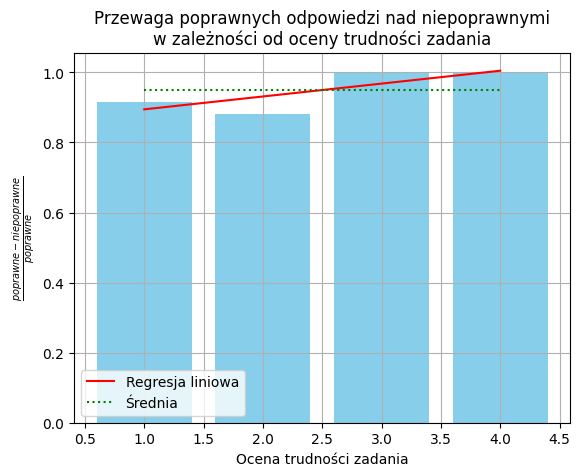

-------------------------------------
2a:
Trudność: 1, Wskaźnik: 1.0
Trudność: 2, Wskaźnik: 0.8461538461538461
Trudność: 3, Wskaźnik: 0.42857142857142855


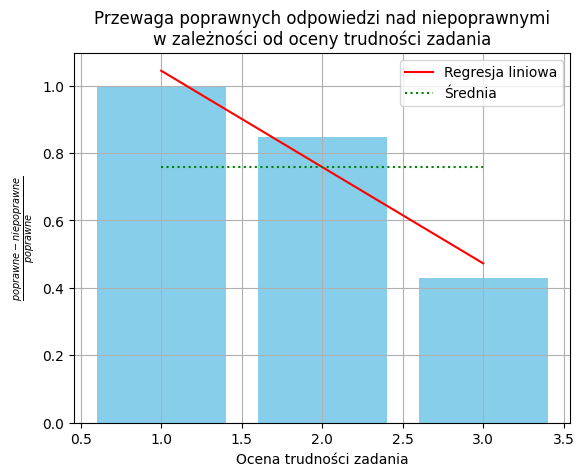

-------------------------------------
2b:
Trudność: 1, Wskaźnik: 1.0
Trudność: 2, Wskaźnik: 0.5
Trudność: 3, Wskaźnik: 0.25
Trudność: 4, Wskaźnik: 0.3333333333333333


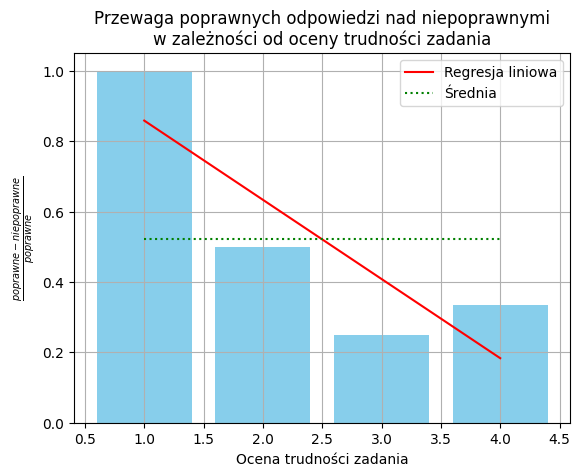

-------------------------------------
3a:
Trudność: 1, Wskaźnik: -5.0
Trudność: 2, Wskaźnik: -1.25
Trudność: 3, Wskaźnik: 0.8888888888888888
Trudność: 4, Wskaźnik: 0.7142857142857143
Trudność: 5, Wskaźnik: 1.0


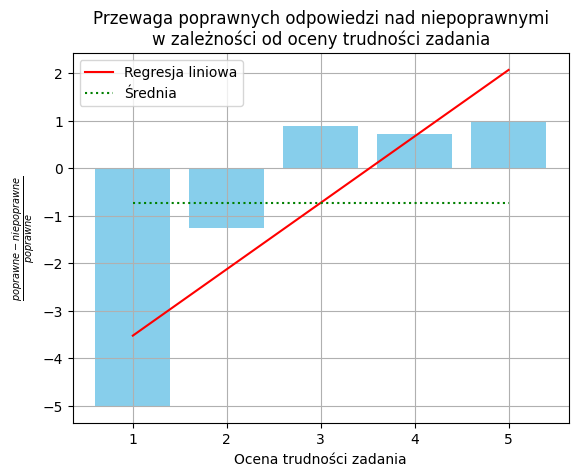

-------------------------------------
3b:
Trudność: 2, Wskaźnik: -0.3333333333333333
Trudność: 3, Wskaźnik: -1.25
Trudność: 4, Wskaźnik: 0.6666666666666666
Trudność: 5, Wskaźnik: 0.0


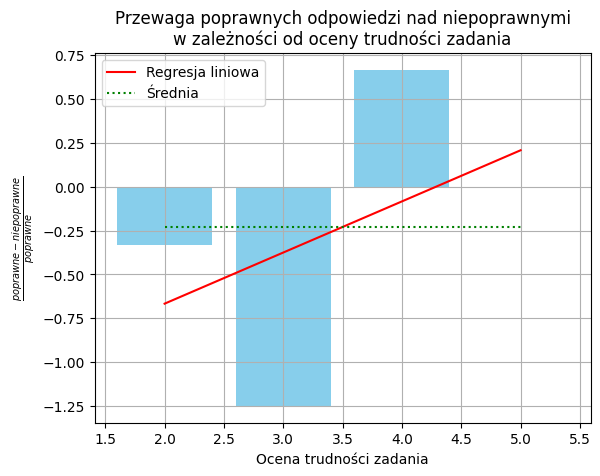

In [27]:
for i, df in enumerate(dfs):
    print('-------------------------------------')
    print(names[i+1])
    corr_answer_index(create_contingency_table(df, 'correctness', 'difficulty'))

### Podsumowanie:
Istnieje istotna statystycznie zależność między poprawnością odpowiedzi a poziomem trudności na poziomie istotności $\alpha=0.05$ dla:
- zsumowanych grafik: 2, 3
- grafiki 2a (trend: poprawne ocenienie trudności)
- grafiki 3a (trend: niedocenienie trudności zadania)

### Czy istnieje istotna statystycznie różnica w ocenie trudności zadania w zależności od poprawności?

**H0:** Nie ma istotnej statystycznie zależności między oceną trudności a poprawnością odpowiedzi.

**H1:** Istnieje istotna statystycznie zależność między oceną trudności a poprawnością odpowiedzi.

**Poziom istotności:** $\alpha=0.05$

-------------------------------------
1a:
U-statistic: 75.0
p-value: 0.6066318186823905
Brak podstaw do odrzucenia H0.


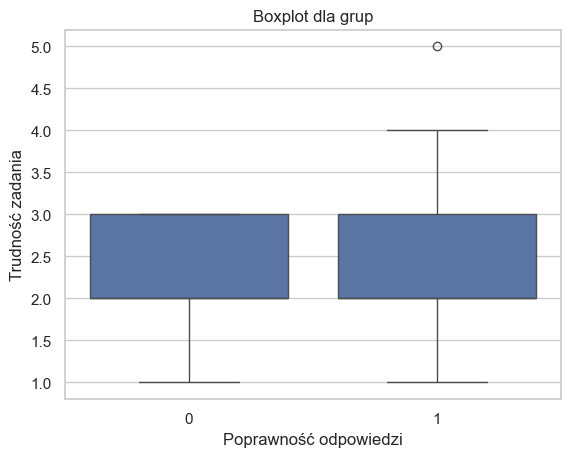

-------------------------------------
1b:
U-statistic: 47.0
p-value: 0.6565972744469257
Brak podstaw do odrzucenia H0.


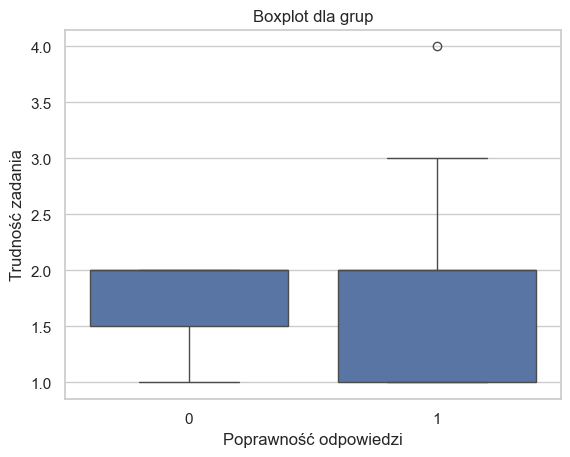

-------------------------------------
2a:
U-statistic: 295.0
p-value: 9.6718500583849e-05
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.


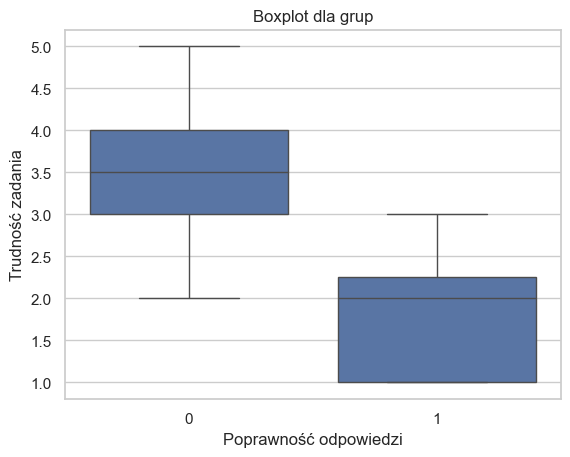

-------------------------------------
2b:
U-statistic: 241.0
p-value: 0.010257173549840544
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.


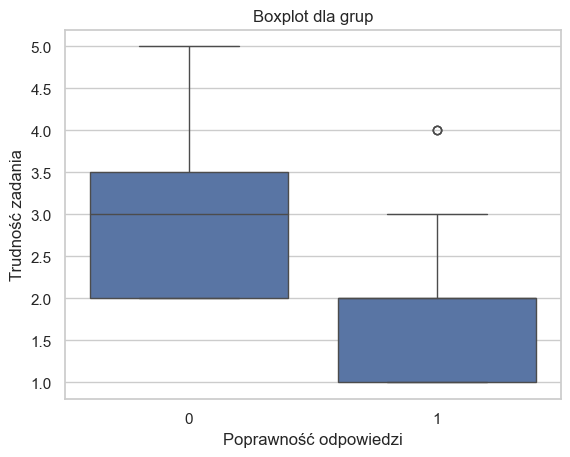

-------------------------------------
3a:
U-statistic: 74.5
p-value: 0.0005395670128607012
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.


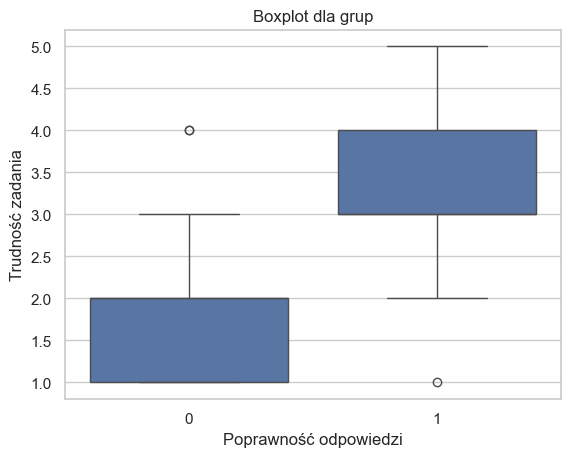

-------------------------------------
3b:
U-statistic: 119.5
p-value: 0.028044959205307383
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.


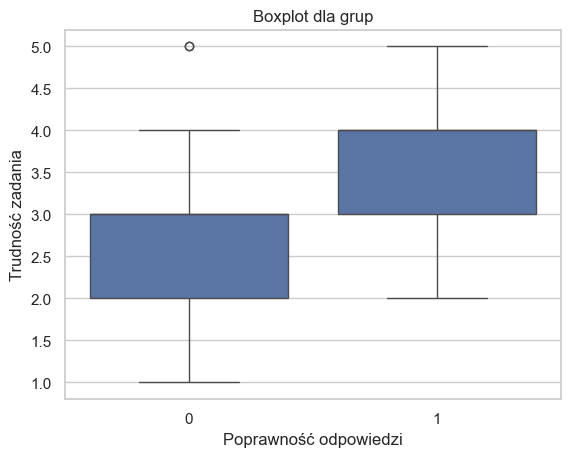

In [37]:
for i, df in enumerate(dfs):
    print('-------------------------------------')
    print(names[i+1])
    mann_whitney_test([df['difficulty'][df['correctness'] == 0], df['difficulty'][df['correctness'] == 1]], ALPHA)
    plot_multi_boxplot(df, 'correctness', 'difficulty', 'Poprawność odpowiedzi', 'Trudność zadania')

Podsumowanie:
Istotne statystycznie:
- 2a, 2b, 3a, 3b

#### Wizualizacje dla kolekcji

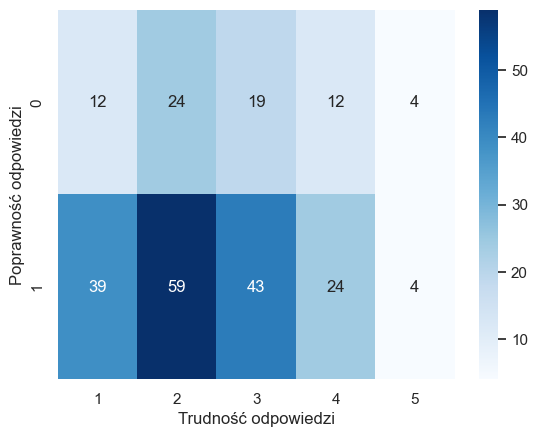

Trudność: 1, Wskaźnik: 0.6923076923076923
Trudność: 2, Wskaźnik: 0.5932203389830508
Trudność: 3, Wskaźnik: 0.5581395348837209
Trudność: 4, Wskaźnik: 0.5
Trudność: 5, Wskaźnik: 0.0


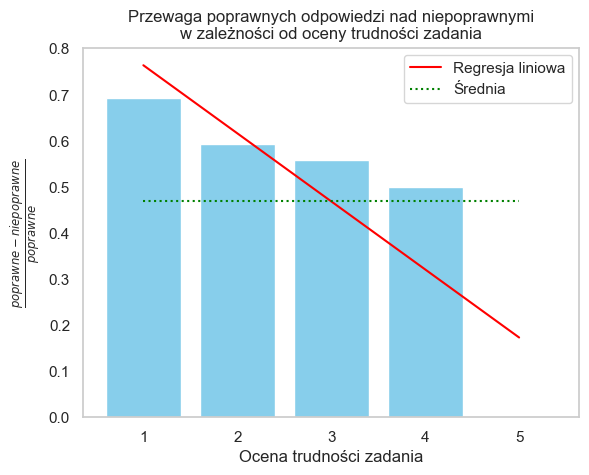

In [38]:
plot_heatmap(df_collAll, 'correctness', 'difficulty', 'Poprawność odpowiedzi', 'Trudność odpowiedzi', cmap='Blues')
corr_answer_index(create_contingency_table(df_collAll, 'correctness', 'difficulty'))

Stosunek $\frac{poprawneOdp - niepoprawneOdp}{poprawneOdp}$ zmniejsza się wraz
ze wzrostem trudności(im wskaźnik jest mniejszy, tym większa jest równowaga poprawnych i niepoprawnych odpowiedzi, duża wartość wskaźnika pokazuje jak silna jest dominacja poprawnych odpowiedzi nad niepoprawnymi)

** Wniosek: ** wraz ze wzrostem trudności zadania malała przewaga poprawnych odpowiedzi

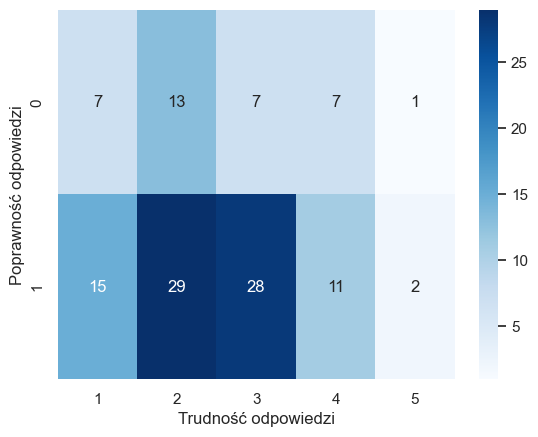

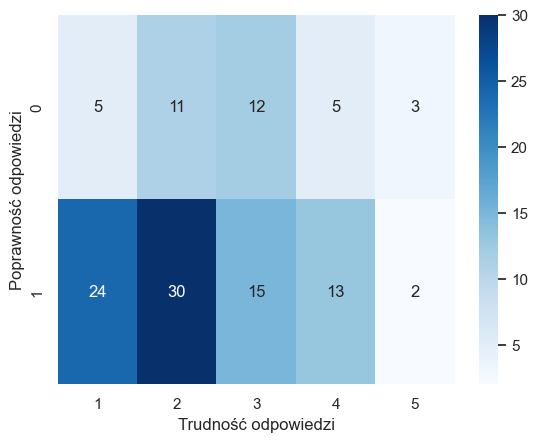

Trudność: 1, Wskaźnik: 0.5333333333333333
Trudność: 2, Wskaźnik: 0.5517241379310345
Trudność: 3, Wskaźnik: 0.75
Trudność: 4, Wskaźnik: 0.36363636363636365
Trudność: 5, Wskaźnik: 0.5


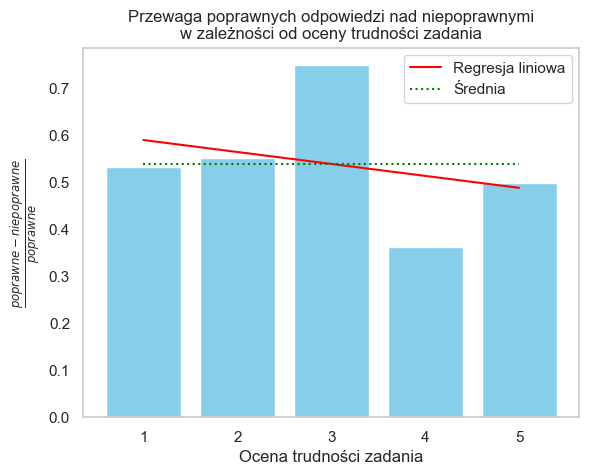

Trudność: 1, Wskaźnik: 0.7916666666666666
Trudność: 2, Wskaźnik: 0.6333333333333333
Trudność: 3, Wskaźnik: 0.2
Trudność: 4, Wskaźnik: 0.6153846153846154
Trudność: 5, Wskaźnik: -0.5


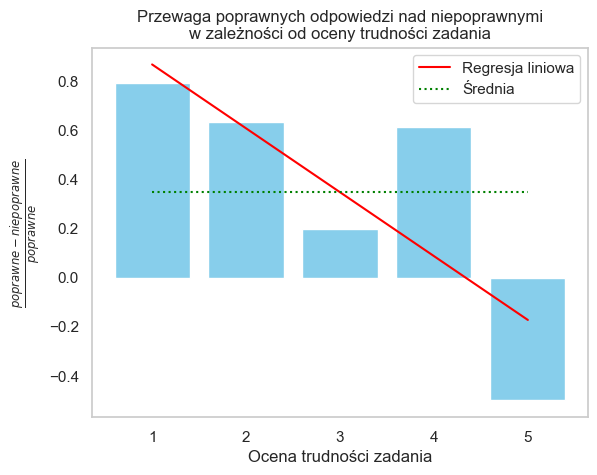

In [39]:
plot_heatmap(df_collA, 'correctness', 'difficulty', 'Poprawność odpowiedzi', 'Trudność odpowiedzi', cmap='Blues')
plot_heatmap(df_collB, 'correctness', 'difficulty', 'Poprawność odpowiedzi', 'Trudność odpowiedzi', cmap='Blues')
corr_answer_index(create_contingency_table(df_collA, 'correctness', 'difficulty'))
corr_answer_index(create_contingency_table(df_collB, 'correctness', 'difficulty'))

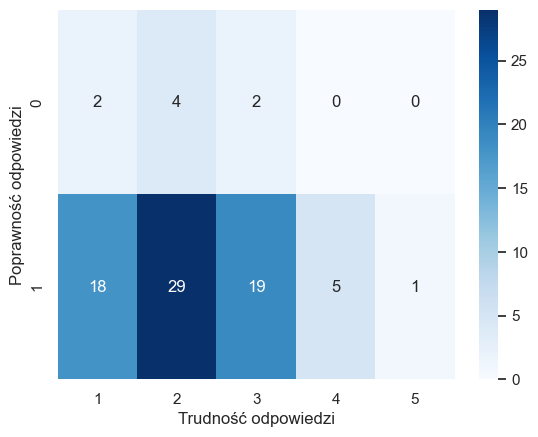

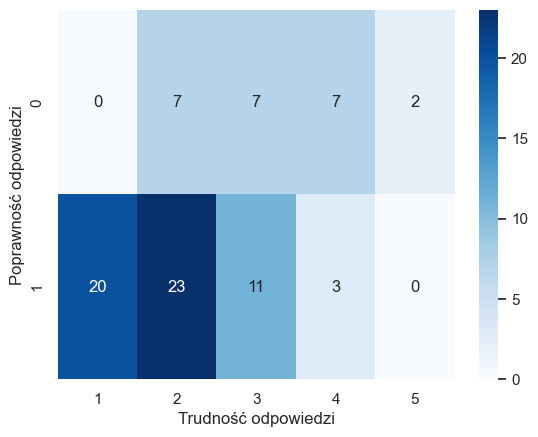

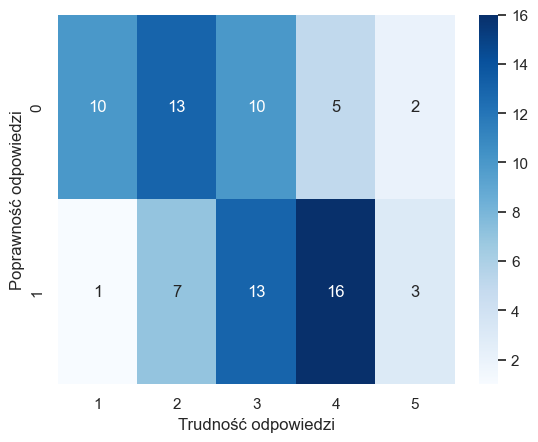

Trudność: 1, Wskaźnik: 0.8888888888888888
Trudność: 2, Wskaźnik: 0.8620689655172413
Trudność: 3, Wskaźnik: 0.8947368421052632
Trudność: 4, Wskaźnik: 1.0
Trudność: 5, Wskaźnik: 1.0


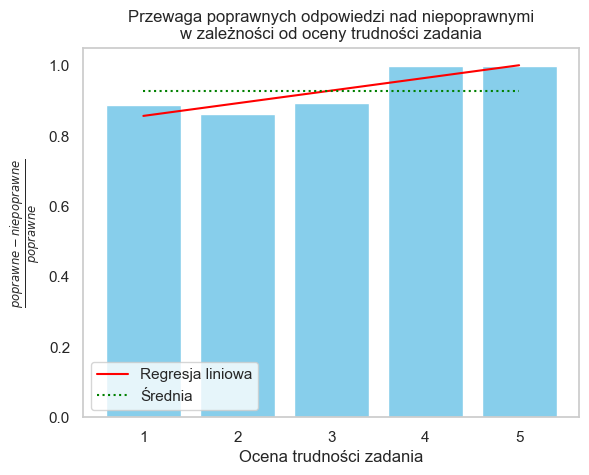

Trudność: 1, Wskaźnik: 1.0
Trudność: 2, Wskaźnik: 0.6956521739130435
Trudność: 3, Wskaźnik: 0.36363636363636365
Trudność: 4, Wskaźnik: -1.3333333333333333


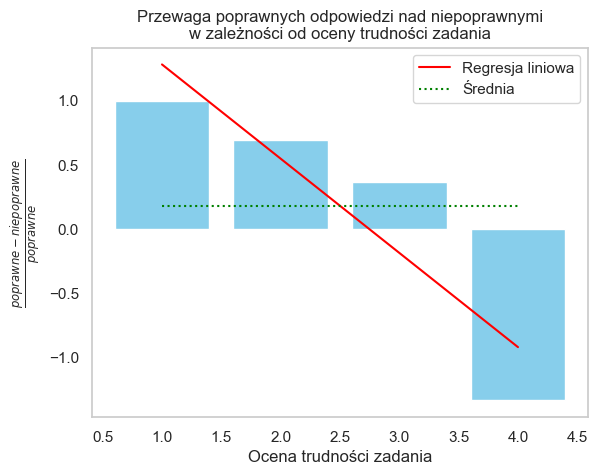

Trudność: 1, Wskaźnik: -9.0
Trudność: 2, Wskaźnik: -0.8571428571428571
Trudność: 3, Wskaźnik: 0.23076923076923078
Trudność: 4, Wskaźnik: 0.6875
Trudność: 5, Wskaźnik: 0.3333333333333333


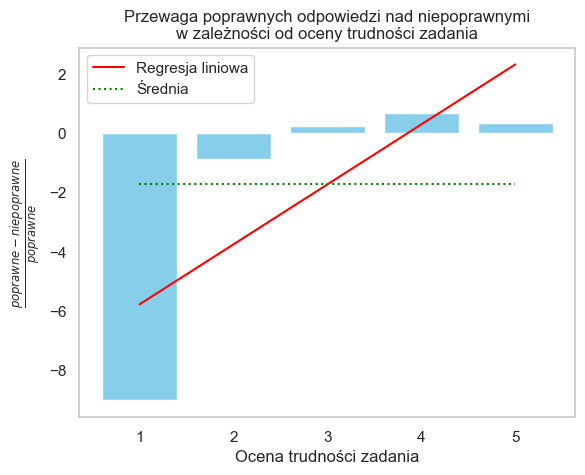

In [40]:
plot_heatmap(df_coll1, 'correctness', 'difficulty', 'Poprawność odpowiedzi', 'Trudność odpowiedzi', cmap='Blues')
plot_heatmap(df_coll2, 'correctness', 'difficulty', 'Poprawność odpowiedzi', 'Trudność odpowiedzi', cmap='Blues')
plot_heatmap(df_coll3, 'correctness', 'difficulty', 'Poprawność odpowiedzi', 'Trudność odpowiedzi', cmap='Blues')
corr_answer_index(create_contingency_table(df_coll1, 'correctness', 'difficulty'))
corr_answer_index(create_contingency_table(df_coll2, 'correctness', 'difficulty'))
corr_answer_index(create_contingency_table(df_coll3, 'correctness', 'difficulty'))